In [1]:
import tensorflow as tf

tf.logging.set_verbosity(tf.logging.ERROR)
print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 1.14.0


In [2]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print(x_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)


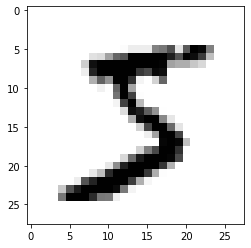

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(x_train[0], cmap = 'binary')

In [5]:
y_train[0]

5

In [6]:
print(set(y_train))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [7]:
from tensorflow.keras.utils import to_categorical

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [8]:
print(y_train_encoded.shape)
print(y_test_encoded.shape)

(60000, 10)
(10000, 10)


In [9]:
y_train_encoded[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [10]:
import numpy as np

x_train_reshaped = np.reshape(x_train,(60000, 784))
x_test_reshaped = np.reshape(x_test,(10000, 784))

x_train_reshaped.shape

(60000, 784)

In [11]:
print(set(x_train_reshaped[0]))

{0, 1, 2, 3, 9, 11, 14, 16, 18, 23, 24, 25, 26, 27, 30, 35, 36, 39, 43, 45, 46, 49, 55, 56, 64, 66, 70, 78, 80, 81, 82, 90, 93, 94, 107, 108, 114, 119, 126, 127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166, 170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205, 207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244, 247, 249, 250, 251, 252, 253, 255}


In [12]:
x_mean = np.mean(x_train_reshaped)
x_std = np.std(x_train_reshaped)

# k= 1e-10

# x_train_norm = (x_train_reshaped -x_mean) / (x_std +k)
# x_test_norm = (x_test_reshaped -x_mean) / (x_std +k)

x_train_norm = (x_train_reshaped - x_mean) / (x_std)
x_test_norm = (x_test_reshaped -x_mean) / (x_std)

In [13]:
print(set(x_train_norm[0]))

{-0.3858901621553201, 1.3069219669849146, 1.1796428595307615, 1.8033104860561113, 1.6887592893473735, 2.821543345689335, 2.7197200597260127, 1.192370770276177, 1.53602436040239, 1.7396709323290347, 2.7960875241985046, 2.6560805059989363, 2.18514780841857, 2.4906176663085375, -0.10587612575618353, 2.681536327489767, 0.03413089244338476, -0.19497150097409063, 0.7723497156774721, 0.9378125553678709, -0.2458831439557518, 2.210603629909401, 1.9051337720194337, 1.2687382347486686, 1.7651267538198654, -0.424073894391566, 0.41596821480584373, -0.2840668761919977, 0.27596119660627544, 1.4596568959298981, 1.2941940562394993, 2.096052433200663, 1.9560454150010949, 2.7579037919622587, 1.4851127174207288, -0.09314821501076823, 2.783359613453089, 2.286971094381893, 2.4524339340722916, 1.3451056992211605, -0.042236572029107036, 2.643352595253521, -0.13133194724701414, 0.7596218049320568, 0.28868910735169073, 0.6068868759870732, 0.6196147867324885, -0.4113459836461507, 0.46687985778750496, 0.950540466

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model=Sequential([
    Dense(128,activation='relu',input_shape=(784,)),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')
])

In [15]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.fit(x_train_norm,y_train_encoded,epochs=3)

Epoch 1/3
60000/60000 [==============================] - 9s 142us/sample - loss: 0.3793 - acc: 0.8884
Epoch 2/3
60000/60000 [==============================] - 4s 66us/sample - loss: 0.1864 - acc: 0.9455
Epoch 3/3
60000/60000 [==============================] - 5s 82us/sample - loss: 0.1413 - acc: 0.9596


In [17]:
loss, accuracy = model.evaluate(x_test_norm,y_test_encoded)
print('Accuracy:',accuracy *100)

10000/10000 [==============================] - 0s 44us/sample - loss: 0.1328 - acc: 0.9603
Accuracy: 96.03000283241272


In [18]:
preds = model.predict(x_test_norm)
preds.shape

(10000, 10)

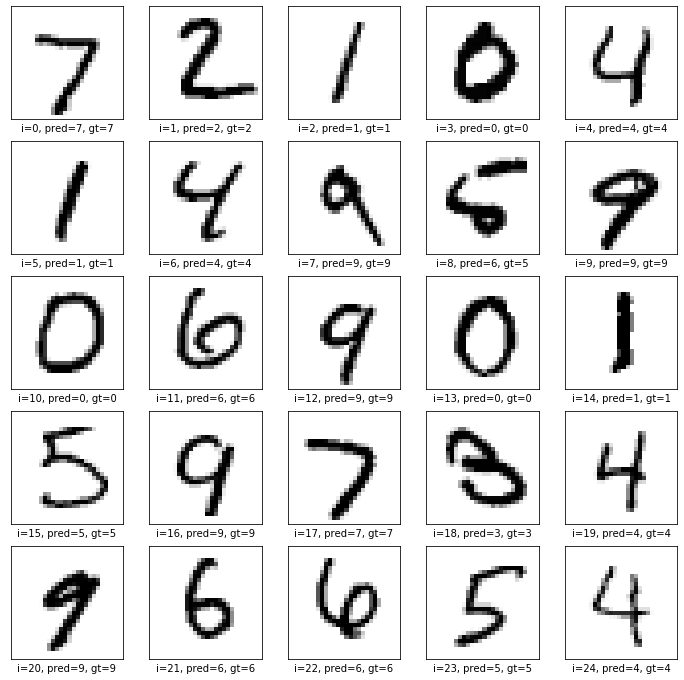

In [19]:
plt.figure(figsize=(12,12))

j=0

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    pred = np.argmax(preds[j+i])
    gt = y_test[j+i]
    
    plt.xlabel('i={}, pred={}, gt={}'.format(j+i, pred, gt))
    plt.imshow(x_test[j+i], cmap='binary')
    
plt.show()


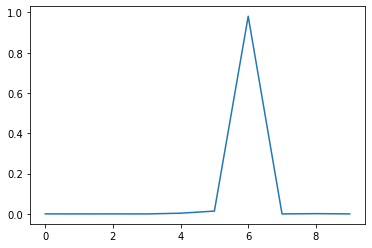

In [20]:
plt.plot(preds[8])